### Student details

Student name: Divya Acharya

Student ID: 23283742


# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [1]:
# import dependencies
import numpy as np
from pandas.core.describe import pd
import pandas

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [2]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data
(provided - should be completed in previous E-tivity)

In [3]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

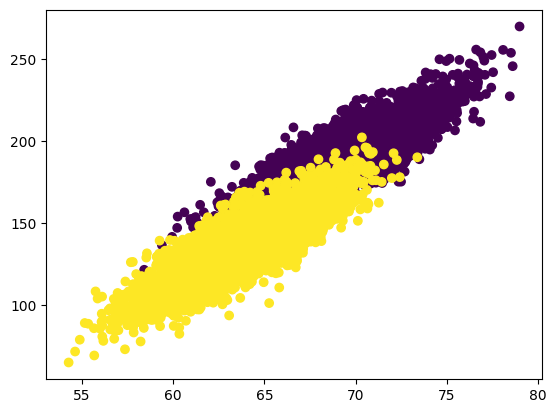

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split
(provided - should be completed in previous E-tivity)

In [5]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('1',X_train)
print('2', X_test)
print('3', y_train)
print('4',y_test)

1 [[ 65.28925911 140.05548283]
 [ 62.73928093 138.53042113]
 [ 63.46342933 138.03925147]
 ...
 [ 64.3254058  156.80050358]
 [ 69.07449203 179.38681672]
 [ 67.58883983 150.38059744]]
2 [[ 68.68723219 173.11581259]
 [ 68.82933377 195.1620421 ]
 [ 66.39812838 170.21745116]
 ...
 [ 63.95730896 127.44497002]
 [ 61.43011255 131.18192954]
 [ 62.45074489 138.80165645]]
3 [ 1  1  1 ...  1 -1  1]
4 [ 1 -1 -1 ...  1  1  1]


### Train the algorithm (Task)

In [6]:
################################
# Your code here
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

ppn = Perceptron(eta=0.01, epochs=10)
ppn.train(X_train,y_train)

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [7]:
################################
# Your code here
from sklearn.metrics import accuracy_score
prediction_train = ppn.predict(X_train)
prediction_test = ppn.predict(X_test)

train_score = accuracy_score(y_train, prediction_train)
print("score on train data", train_score)
test_score = accuracy_score(y_test, prediction_test)
print("score on test data", test_score)

score on train data 0.8692537313432835
score on test data 0.8642424242424243


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

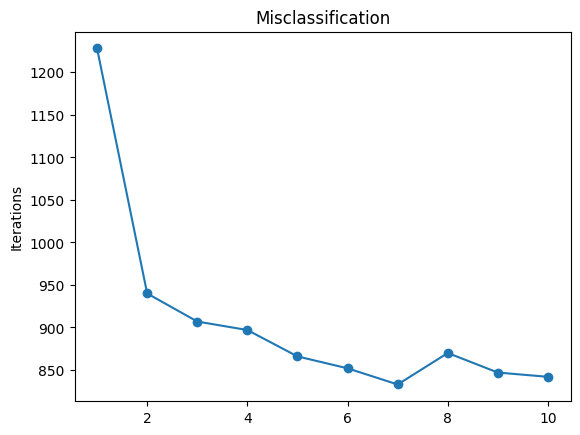

In [8]:
################################
# Your code here
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.ylabel('Iterations')
plt.title('Misclassification')
plt.show()

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses?
As training unfolds, the perceptron's objective is to identify a decision boundary that effectively separates data into Male and Female classes. This is achieved by modifying its internal weights based on prediction errors compared to the actual classes. Each training epoch involves iterating through the data and fine-tuning the weights to minimize misclassifications. The error curve in the visualization gradually declines, signifying a reduction in misclassifications, as the perceptron becomes more adept at accurately distinguishing between Male and Female data points.
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
In the final epoch, the perceptron might not reach the perfect solution. While errors decrease with each epoch, they may not reach zero, especially if the data isn't perfectly linearly separable. The perceptron utilizes a linear equation for its decision boundary, so if the data requires a non-linear separation, some misclassifications may persist.
3.	Why can’t we get zero error with this data?
Data cannot be separated linearly.As a result, drawing a single straight line that completely separates all male and female data points is impossible. The perceptron algorithm attempts to find a linear decision border, but misclassifications are unavoidable when data points overlap or are combined. In circumstances of non-linear separability, the technique can minimise error but may not eradicate all mistakes.


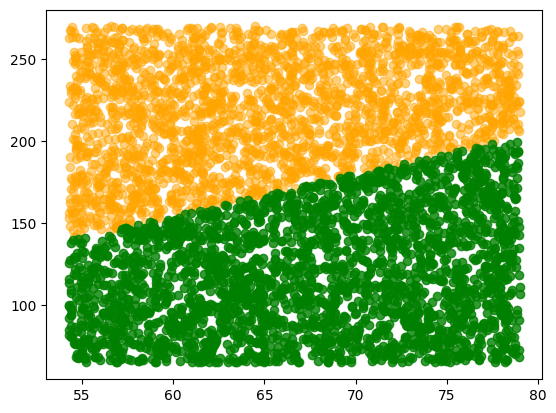

In [14]:
np.random.seed(0)

import numpy as np
random_heights = np.random.uniform(min(data['Height']), max(data['Height']), 5000).reshape(5000,1)
random_weights = np.random.uniform(min(data['Weight']), max(data['Weight']), 5000).reshape(5000,1)

random_samples = np.concatenate((random_heights,random_weights), axis = 1)
predicted_genders = ppn.predict(random_samples)

plt.scatter(random_samples[predicted_genders == -1][:, 0], random_samples[predicted_genders == -1][:, 1], color='orange', label='Predicted Male', alpha=0.5)
plt.scatter(random_samples[predicted_genders == 1][:, 0], random_samples[predicted_genders == 1][:, 1], color='green', label='Predicted Female', alpha=0.8)
plt.show()


## Early exit criteria

score on train data 0.8605970149253731
score on test data 0.8545454545454545


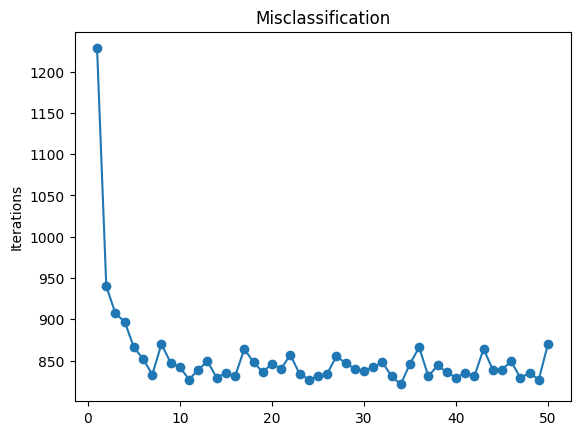

In [13]:
class PerceptronEE(Perceptron):
    def __init__(self, eta=0.01, epochs=50):
        super().__init__(eta, epochs)

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

        return self

# Usage of PerceptronEE with an early exit criterion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pee = PerceptronEE(eta=0.1, epochs=50)
pee.train(X_train, y_train)


from sklearn.metrics import accuracy_score
prediction_train = pee.predict(X_train)
prediction_test = pee.predict(X_test)

train_score = accuracy_score(y_train, prediction_train)
print("score on train data", train_score)
test_score = accuracy_score(y_test, prediction_test)
print("score on test data", test_score)

plt.plot(range(1, len(pee.errors_) + 1), pee.errors_, marker='o')
plt.ylabel('Iterations')
plt.title('Misclassification')
plt.show()